In [1]:
from sympy import *
import numpy as np
from copy import copy
init_printing()

In [2]:
vx_a_in, vy_a_in, sxx_a_in, sxy_a_in, syy_a_in = symbols('v^in_ax, v^in_ay, sigma^in_axx, sigma^in_axy, sigma^in_ayy')
vx_b_in, vy_b_in, sxx_b_in, sxy_b_in, syy_b_in = symbols('v^in_bx, v^in_by, sigma^in_bxx, sigma^in_bxy, sigma^in_byy')
vx_c_in, vy_c_in, sxx_c_in, sxy_c_in, syy_c_in = symbols('v^in_cx, v^in_cy, sigma^in_cxx, sigma^in_cxy, sigma^in_cyy')
vx_d_in, vy_d_in, sxx_d_in, sxy_d_in, syy_d_in = symbols('v^in_dx, v^in_dy, sigma^in_dxx, sigma^in_dxy, sigma^in_dyy')
vx_e_in, vy_e_in, sxx_e_in, sxy_e_in, syy_e_in = symbols('v^in_ex, v^in_ey, sigma^in_exx, sigma^in_exy, sigma^in_eyy')
eta_x, eta_y, nx, ny = symbols('eta_x, eta_y, n_x, n_y')
f, g = symbols('f, g')

rho, lam, mu = symbols('rho, lambda, mu')
vx, vy, sxx, sxy, syy, Vx, Vy, Sxx, Sxy, Syy = symbols('v_x, v_y, sigma_xx, sigma_xy, sigma_yy, V_x, V_y, S_xx, S_xy, S_yy')

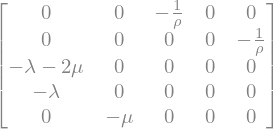

Собственные вектора


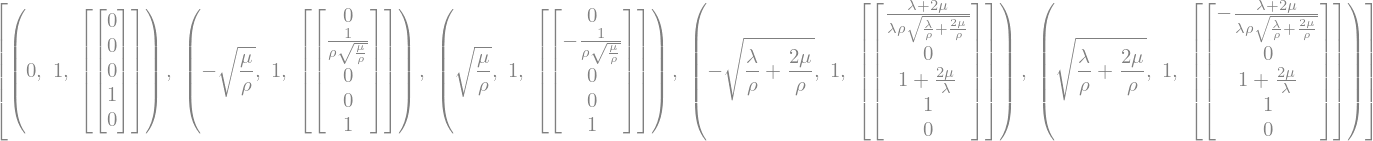

Матрица из собств. векторов Ay


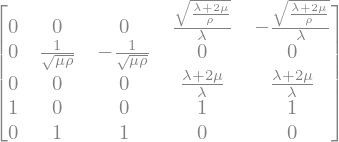

In [27]:
Ax = Matrix([[0, 0, -1 / rho, 0, 0],
             [0, 0, 0, 0, -1 / rho],
             [-lam - 2 * mu, 0, 0, 0, 0],
             [-lam, 0, 0, 0, 0],
             [0, -mu, 0, 0, 0]])
display(symbols('A_x'), Ax)
print('Собственные вектора')
display(Ax.eigenvects())

matrix = Matrix([[0, 0, 0, 1, 0],
                 [0, 1 / sqrt(mu * rho), 0, 0, 1],
                 [0, -1 / sqrt(mu * rho), 0, 0, 1],
                 [sqrt((lam + 2 * mu) / rho) / lam, 0, (lam + 2 * mu) / lam, 1, 0],
                 [-sqrt((lam + 2 * mu) / rho) / lam, 0, (lam + 2 * mu) / lam, 1, 0]])
print('Матрица из собств. векторов Ay')
display(simplify(matrix.transpose()))

OmegaOutL (λ < 0, w_2 и w_4)


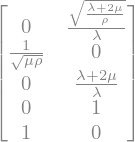

OmegaOutR (λ > 0, w_3 и w_5)


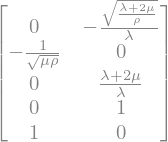

In [28]:
OmegaOutL = Matrix([[0, 1 / sqrt(mu * rho), 0, 0, 1],
                    [sqrt((lam + 2 * mu) / rho) / lam, 0, (lam + 2 * mu) / lam, 1, 0]]).transpose()
print('OmegaOutL (λ < 0, w_2 и w_4)')
display(OmegaOutL)

OmegaOutR = Matrix([[0, -1 / sqrt(mu * rho), 0, 0, 1],
                    [-sqrt((lam + 2 * mu) / rho) / lam, 0, (lam + 2 * mu) / lam, 1, 0]]).transpose()
print('OmegaOutR (λ > 0, w_3 и w_5)')
display(OmegaOutR)

BOmegaOutR


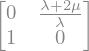

BOmegaOutRm1


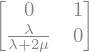

MultiplicativeMatrixR


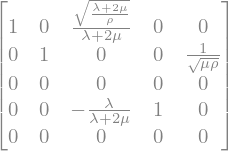

AdditiveVectorR


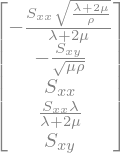

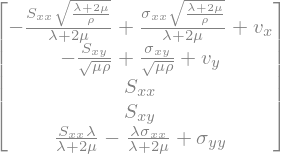

In [29]:
B = Matrix([[0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1]])
b = Matrix([sxx, sxy])
q = Matrix([vx, vy, sxx, syy, sxy])
# B * q = b

BOmegaOutR = B * OmegaOutR
print('BOmegaOutR')
display(BOmegaOutR)

BOmegaOutRm1 = BOmegaOutR.inv()
print('BOmegaOutRm1')
display(BOmegaOutRm1)

MultiplicativeMatrixR = simplify(eye(5) - OmegaOutR * BOmegaOutRm1 * B)
print('MultiplicativeMatrixR')
display(MultiplicativeMatrixR)

AdditiveVectorR = (OmegaOutR * BOmegaOutRm1 * b).subs({sxx: Sxx, sxy: Sxy})
print('AdditiveVectorR')
display(AdditiveVectorR)

q_ = np.array(MultiplicativeMatrixR * q + AdditiveVectorR)
q = q_.copy()
q[3], q[4] = q_[4], q_[3]
display(symbols('q^n+1'), Matrix(q))

###### Среда "e"
$$
v_x = v_x^{in} + n_x \left({\frac{1}{\sqrt{\rho \left({\lambda + 2 \mu}\right)}}}\right) \left({\sigma_{xx}^{in} - S_{xx}}\right)\\
v_y = v_y^{in} + n_x \left({\frac{1}{\sqrt{\mu \rho}}}\right) \left({\sigma_{xy}^{in} - S_{xy}}\right)\\
\sigma_{xx} = S_{xx}\\
\sigma_{xy} = S_{xy}\\
\sigma_{yy} = \sigma_{yy}^{in} + n_x \left({-\frac{\lambda}{\lambda + 2 \mu}}\right) \left({\sigma_{xx}^{in} - S_{xx}}\right)
$$

BOmegaOutL


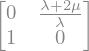

BOmegaOutLm1


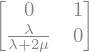

MultiplicativeMatrixL


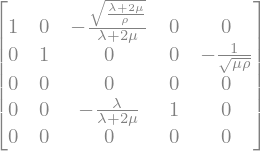

AdditiveVectorL


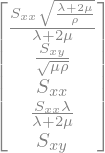

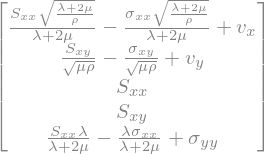

In [30]:
B = Matrix([[0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1]])
b = Matrix([sxx, sxy])
q = Matrix([vx, vy, sxx, syy, sxy])

BOmegaOutL = B * OmegaOutL
print('BOmegaOutL')
display(BOmegaOutL)

BOmegaOutLm1 = BOmegaOutL.inv()
print('BOmegaOutLm1')
display(BOmegaOutLm1)

MultiplicativeMatrixL = simplify(eye(5) - OmegaOutL * BOmegaOutLm1 * B)
print('MultiplicativeMatrixL')
display(MultiplicativeMatrixL)

AdditiveVectorL = simplify(OmegaOutL * BOmegaOutLm1 * b).subs({sxx: Sxx, sxy: Sxy})
print('AdditiveVectorL')
display(AdditiveVectorL)

q_ = np.array(MultiplicativeMatrixL * q + AdditiveVectorL)
q = q_.copy()
q[3], q[4] = q_[4], q_[3]
display(symbols('q^n+1'), Matrix(q))

###### Среда "a"
$$
v_x = v_x^{in} + n_y \left({-\frac{1}{\sqrt{\rho \left({\lambda + 2 \mu}\right)}}}\right) \left({\sigma_{xx}^{in} - S_{xx}}\right) \\
v_y = v_y^{in} + n_y \left({-\frac{1}{\sqrt{\mu \rho}}}\right) \left({\sigma_{xy}^{in} - S_{xy}}\right) \\
\sigma_{xx} = S_{xx}\\
\sigma_{xy} = S_{xy}\\
\sigma_{yy} = \sigma_{yy}^{in} + n_y \left({-\frac{\lambda}{\lambda + 2 \mu}}\right) \left({\sigma_{xx}^{in} - S_{xx}}\right)
$$

## Формулы на границе "ae":

In [31]:
vx_a = vx_a_in + ny * (-1 / sqrt(rho * (lam + 2 * mu))) * (sxx_a_in - Sxx)
vy_a = vy_a_in + ny * (-1 / sqrt(mu * rho)) * (sxy_a_in - Sxy)
syy_a = syy_a_in + ny * (-lam / (lam + 2 * mu)) * (sxx_a_in - Sxx)
sxx_a, sxy_a = Sxx, Sxy

vx_e = vx_e_in + nx * (1 / sqrt(rho * (lam + 2 * mu))) * (sxx_e_in - Sxx)
vy_e = vy_e_in + nx * (1 / sqrt(mu * rho)) * (sxy_e_in - Sxy)
syy_e = sxx_e_in + nx * (-lam / (lam + 2 * mu)) * (sxx_e_in - Sxx)
sxx_e, sxy_e = Sxx, Sxy

d = {sqrt(rho * (lam + 2 * mu)): f, sqrt(mu * rho): g}
sol = simplify(solve([Eq(eta_x * (vx_e - vx_a), Sxy), Eq(eta_y * (vy_e - vy_a), Sxx)], [Sxy, Sxx])).subs(d)
S_xy, S_xx = sol[Sxy], sol[Sxx]

In [32]:
print(S_xx, '\n', S_xy)

eta_y*(-eta_x*(n_x + n_y)*(-f*v^in_ax + f*v^in_ex + n_x*sigma^in_exx + n_y*sigma^in_axx) + f*(-g*v^in_ay + g*v^in_ey + n_x*sigma^in_exy + n_y*sigma^in_axy))/(-eta_x*eta_y*(n_x + n_y)**2 + f*g) 
 eta_x*(-eta_y*(n_x + n_y)*(-g*v^in_ay + g*v^in_ey + n_x*sigma^in_exy + n_y*sigma^in_axy) + g*(-f*v^in_ax + f*v^in_ex + n_x*sigma^in_exx + n_y*sigma^in_axx))/(-eta_x*eta_y*(n_x + n_y)**2 + f*g)


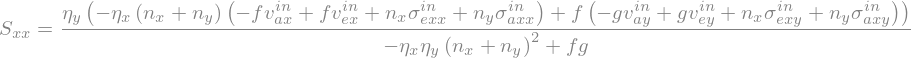

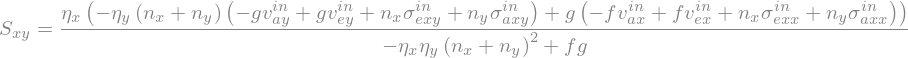

замена:


a:


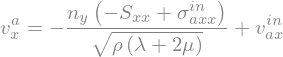

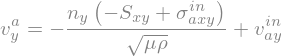

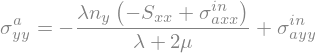

e:


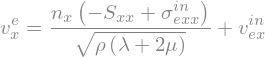

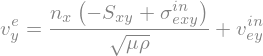

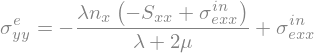

In [33]:
display(Eq(Sxx, S_xx), Eq(Sxy, S_xy))
print('замена:')
display(Eq(f, sqrt(rho * (lam + 2 * mu))), Eq(g, sqrt(mu * rho)))
q_a, q_e = Matrix([vx_a, vy_a, sxx_a, sxy_a, syy_a]), Matrix([vx_e, vy_e, sxx_e, sxy_e, syy_e])
print('a:')
display(Eq(symbols('v_x^a'), q_a[0]), Eq(symbols('v_y^a'), q_a[1]), Eq(symbols('sigma_xx^a'), q_a[2]), Eq(symbols('sigma_xy^a'), q_a[3]), Eq(symbols('sigma_yy^a'), q_a[4]))
print('e:')
display(Eq(symbols('v_x^e'), q_e[0]), Eq(symbols('v_y^e'), q_e[1]), Eq(symbols('sigma_xx^e'), q_e[2]), Eq(symbols('sigma_xy^e'), q_e[3]), Eq(symbols('sigma_yy^e'), q_e[4]))

## Формулы на границе "ac":

In [34]:
vx_c = vx_c_in + ny * (-1 / sqrt(rho * (lam + 2 * mu))) * (sxx_c_in - Sxx)
vy_c = vy_c_in + ny * (-1 / sqrt(mu * rho)) * (sxy_c_in - Sxy)
syy_c = syy_c_in + ny * (-lam / (lam + 2 * mu)) * (sxx_c_in - Sxx)
sxx_c, sxy_c = Sxx, Sxy

vx_a = vx_a_in + nx * (1 / sqrt(rho * (lam + 2 * mu))) * (sxx_a_in - Sxx)
vy_a = vy_a_in + nx * (1 / sqrt(mu * rho)) * (sxy_a_in - Sxy)
syy_a = sxx_a_in + nx * (-lam / (lam + 2 * mu)) * (sxx_a_in - Sxx)
sxx_a, sxy_a = Sxx, Sxy

d = {sqrt(rho * (lam + 2 * mu)): f, sqrt(mu * rho): g}
sol = simplify(solve([Eq(eta_x * (vx_a - vx_c), Sxy), Eq(eta_y * (vy_a - vy_c), Sxx)], [Sxy, Sxx])).subs(d)
S_xy, S_xx = sol[Sxy], sol[Sxx]

In [35]:
print(S_xx, '\n', S_xy)

eta_y*(-eta_x*(n_x + n_y)*(f*v^in_ax - f*v^in_cx + n_x*sigma^in_axx + n_y*sigma^in_cxx) + f*(g*v^in_ay - g*v^in_cy + n_x*sigma^in_axy + n_y*sigma^in_cxy))/(-eta_x*eta_y*(n_x + n_y)**2 + f*g) 
 eta_x*(-eta_y*(n_x + n_y)*(g*v^in_ay - g*v^in_cy + n_x*sigma^in_axy + n_y*sigma^in_cxy) + g*(f*v^in_ax - f*v^in_cx + n_x*sigma^in_axx + n_y*sigma^in_cxx))/(-eta_x*eta_y*(n_x + n_y)**2 + f*g)


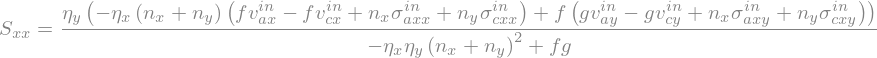

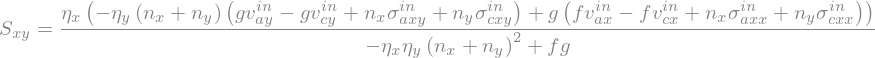

замена:


c:


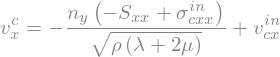

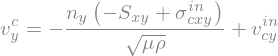

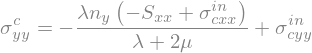

a:


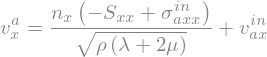

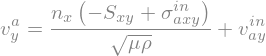

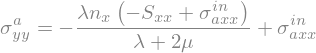

In [36]:
display(Eq(Sxx, S_xx), Eq(Sxy, S_xy))
print('замена:')
display(Eq(f, sqrt(rho * (lam + 2 * mu))), Eq(g, sqrt(mu * rho)))
q_c, q_a = Matrix([vx_c, vy_c, sxx_c, sxy_c, syy_c]), Matrix([vx_a, vy_a, sxx_a, sxy_a, syy_a])
print('c:')
display(Eq(symbols('v_x^c'), q_c[0]), Eq(symbols('v_y^c'), q_c[1]), Eq(symbols('sigma_xx^c'), q_c[2]), Eq(symbols('sigma_xy^c'), q_c[3]), Eq(symbols('sigma_yy^c'), q_c[4]))
print('a:')
display(Eq(symbols('v_x^a'), q_a[0]), Eq(symbols('v_y^a'), q_a[1]), Eq(symbols('sigma_xx^a'), q_a[2]), Eq(symbols('sigma_xy^a'), q_a[3]), Eq(symbols('sigma_yy^a'), q_a[4]))

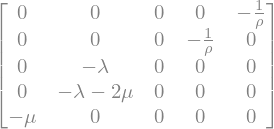

Собственные вектора


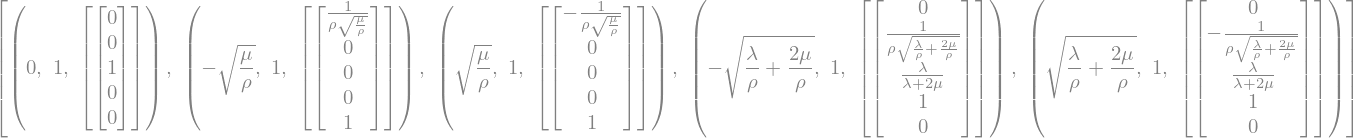

Матрица из собств. векторов Ay


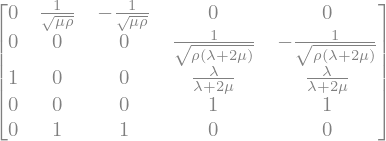

In [37]:
Ay = Matrix([[0, 0, 0, 0, -1 / rho],
             [0, 0, 0, -1 / rho, 0],
             [0, - lam, 0, 0, 0],
             [0, - lam - 2 * mu, 0, 0, 0],
             [- mu, 0, 0, 0, 0]])
display(symbols('A_y'), Ay)
print('Собственные вектора')
display(Ay.eigenvects())

matrix = Matrix([[0, 0, 1, 0, 0],
                 [1 / sqrt(mu * rho), 0, 0, 0, 1],
                 [-1 / sqrt(mu * rho), 0, 0, 0, 1],
                 [0, 1 / sqrt((lam + 2 * mu) * rho), lam / (lam + 2 * mu), 1, 0],
                 [0, -1 / sqrt((lam + 2 * mu) * rho), lam / (lam + 2 * mu), 1, 0]])
print('Матрица из собств. векторов Ay')
display(simplify(matrix.transpose()))

OmegaOutL (λ < 0, w_2 и w_4)


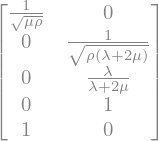

OmegaOutR (λ > 0, w_3 и w_5)


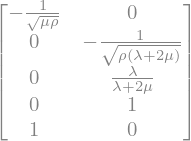

In [38]:
OmegaOutL = Matrix([[1 / sqrt(mu * rho), 0, 0, 0, 1],
                    [0, 1 / sqrt((lam + 2 * mu) * rho), lam / (lam + 2 * mu), 1, 0]]).transpose()
print('OmegaOutL (λ < 0, w_2 и w_4)')
display(OmegaOutL)

OmegaOutR = Matrix([[-1 / sqrt(mu * rho), 0, 0, 0, 1],
                    [0, -1 / sqrt((lam + 2 * mu) * rho), lam / (lam + 2 * mu), 1, 0]]).transpose()

print('OmegaOutR (λ > 0, w_3 и w_5)')
display(OmegaOutR)

BOmegaOutR


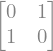

BOmegaOutRm1


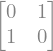

MultiplicativeMatrixR


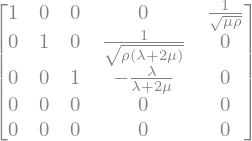

AdditiveVectorR


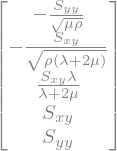

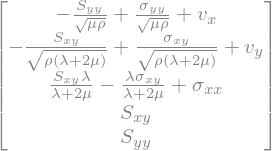

In [39]:
B = Matrix([[0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1]])
b = Matrix([sxy, syy])
q = Matrix([vx, vy, sxx, sxy, syy])
# B * q = b

BOmegaOutR = B * OmegaOutR
print('BOmegaOutR')
display(BOmegaOutR)

BOmegaOutRm1 = BOmegaOutR.inv()
print('BOmegaOutRm1')
display(BOmegaOutRm1)

MultiplicativeMatrixR = simplify(eye(5) - OmegaOutR * BOmegaOutRm1 * B)
print('MultiplicativeMatrixR')
display(MultiplicativeMatrixR)

AdditiveVectorR = (OmegaOutR * BOmegaOutRm1 * b).subs({sxy: Sxy, syy: Syy})
print('AdditiveVectorR')
display(AdditiveVectorR)

display(symbols('q^n+1'), MultiplicativeMatrixR * q + AdditiveVectorR)

###### Среда "b"
$$ v_x = v_x^{in} + n_x \left({\frac{1}{\sqrt{\mu \rho}}}\right) \left({\sigma_{yy}^{in} - S_{yy}}\right) $$  
$$ v_y = v_y^{in} + n_x \left({\frac{1}{\sqrt{\rho \left({\lambda + 2 \mu}\right)}}}\right) \left({\sigma_{xy}^{in} - S_{xy}}\right) $$  
$$ \sigma_{xx} = \sigma_{xx}^{in} + n_x \left({-\frac{\lambda}{\lambda + 2\mu}}\right) \left({\sigma_{xy}^{in} - S_{xy}}\right) $$  
$$ \sigma_{xy} = S_{xy} $$  
$$ \sigma_{yy} = S_{yy} $$

BOmegaOutL


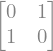

BOmegaOutLm1


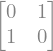

MultiplicativeMatrixL


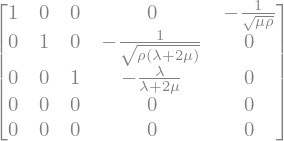

AdditiveVectorL


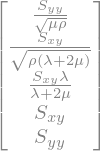

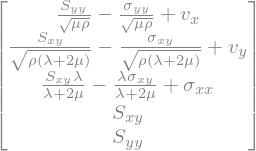

In [40]:
BOmegaOutL = B * OmegaOutL
print('BOmegaOutL')
display(BOmegaOutL)

BOmegaOutLm1 = BOmegaOutL.inv()
print('BOmegaOutLm1')
display(BOmegaOutLm1)

MultiplicativeMatrixL = simplify(eye(5) - OmegaOutL * BOmegaOutLm1 * B)
print('MultiplicativeMatrixL')
display(MultiplicativeMatrixL)

AdditiveVectorL = simplify(OmegaOutL * BOmegaOutLm1 * b).subs({sxy: Sxy, syy: Syy})
print('AdditiveVectorL')
display(AdditiveVectorL)

display(symbols('q^n+1'), MultiplicativeMatrixL * q + AdditiveVectorL)

###### Среда "a":
$$ v_x = v_x^{in} + n_y \left({-\frac{1}{\sqrt{\mu \rho}}}\right) \left({\sigma_{yy}^{in} - S_{yy}}\right) $$  
$$ v_y = v_y^{in} + n_y \left({-\frac{1}{\sqrt{\rho \left({\lambda + 2\mu}\right)}}}\right) \left({\sigma_{xy}^{in} - S_{xy}}\right) $$  
$$ \sigma_{xx} = \sigma_{xx}^{in} + n_y \left({-\frac{\lambda}{\lambda + 2\mu}}\right) \left({\sigma_{xy}^{in} - S_{xy}}\right) $$  
$$ \sigma_{xy} = S_{xy} $$  
$$ \sigma_{yy} = S_{yy} $$

###### Граничные условия "ab":
$$ \eta_x \left({v_x^a - v_x^b}\right) = \sigma_{xy} = S_{xy} \\
\eta_y \left({v_y^a - v_y^b}\right) = \sigma_{yy} = S_{yy} \\
\Rightarrow \\
\eta_x \left[{\left({{v_x^{in}}_a + n_y \left(-{\frac{1}{\sqrt{\mu \rho}}}\right) \left({{\sigma_{yy}^{in}}_a - S_{yy}}\right)}\right) - \left({{v_x^{in}}_b + n_x \left({\frac{1}{\sqrt{\mu \rho}}}\right) \left({{\sigma_{yy}^{in}}_b - S_{yy}}\right)}\right)}\right] = {\sigma_{xy}^{in}}_a = {\sigma_{xy}^{in}}_b = S_{xy} \\
\eta_y \left[{\left({{v_y^{in}}_a + n_y \left({-\frac{1}{\sqrt{\rho \left({\lambda + 2\mu}\right)}}}\right) \left({{\sigma_{xy}^{in}}_a - S_{xy}}\right)}\right) - \left({{v_y^{in}}_b + n_x \left({\frac{1}{\sqrt{\rho \left({\lambda + 2 \mu}\right)}}}\right) \left({{\sigma_{xy}^{in}}_b - S_{xy}}\right)}\right)}\right] = {\sigma_{yy}^{in}}_a = {\sigma_{yy}^{in}}_b = S_{yy}
$$

## Формулы на границе ab

In [41]:
vx_a = vx_a_in + ny * (-1 / sqrt(mu * rho)) * (syy_a_in - Syy)
vy_a = vy_a_in + ny * (-1 / sqrt(rho * (lam + 2 * mu))) * (sxy_a_in - Sxy)
sxx_a = sxx_a_in + ny * (-lam / (lam + 2 * mu)) * (sxy_a_in - Sxy)
sxy_a, syy_a = Sxy, Syy

vx_b = vx_b_in + nx * (1 / sqrt(mu * rho)) * (syy_b_in - Syy)
vy_b = vy_b_in + nx * (1 / sqrt(rho * (lam + 2 * mu))) * (sxy_b_in - Sxy)
sxx_b = sxx_b_in + nx * (-lam / (lam + 2 * mu)) * (sxy_b_in - Sxy)
sxy_b, syy_b = Sxy, Syy

d = {sqrt(rho * (lam + 2 * mu)): f, sqrt(mu * rho): g}
sol = simplify(solve([Eq(eta_x * (vx_a - vx_b), Sxy), Eq(eta_y * (vy_a - vy_b), Syy)], [Sxy, Syy])).subs(d)
S_xy, S_yy = sol[Sxy], sol[Syy]

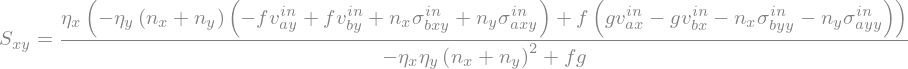

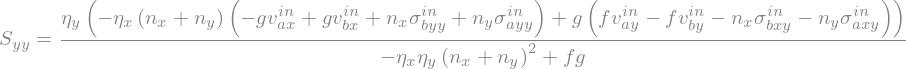

замена:


a:


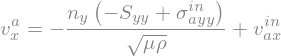

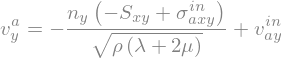

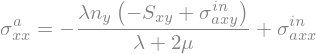

b:


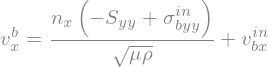

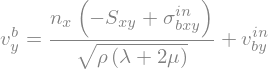

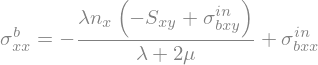

In [42]:
display(Eq(Sxy, S_xy), Eq(Syy, S_yy))
print('замена:')
display(Eq(f, sqrt(rho * (lam + 2 * mu))), Eq(g, sqrt(mu * rho)))
q_a, q_b = Matrix([vx_a, vy_a, sxx_a, sxy_a, syy_a]), Matrix([vx_b, vy_b, sxx_b, sxy_b, syy_b])
print('a:')
display(Eq(symbols('v_x^a'), q_a[0]), Eq(symbols('v_y^a'), q_a[1]), Eq(symbols('sigma_xx^a'), q_a[2]), Eq(symbols('sigma_xy^a'), q_a[3]), Eq(symbols('sigma_yy^a'), q_a[4]))
print('b:')
display(Eq(symbols('v_x^b'), q_b[0]), Eq(symbols('v_y^b'), q_b[1]), Eq(symbols('sigma_xx^b'), q_b[2]), Eq(symbols('sigma_xy^b'), q_b[3]), Eq(symbols('sigma_yy^b'), q_b[4]))

In [43]:
print(S_xy, '\n', S_yy)

eta_x*(-eta_y*(n_x + n_y)*(-f*v^in_ay + f*v^in_by + n_x*sigma^in_bxy + n_y*sigma^in_axy) + f*(g*v^in_ax - g*v^in_bx - n_x*sigma^in_byy - n_y*sigma^in_ayy))/(-eta_x*eta_y*(n_x + n_y)**2 + f*g) 
 eta_y*(-eta_x*(n_x + n_y)*(-g*v^in_ax + g*v^in_bx + n_x*sigma^in_byy + n_y*sigma^in_ayy) + g*(f*v^in_ay - f*v^in_by - n_x*sigma^in_bxy - n_y*sigma^in_axy))/(-eta_x*eta_y*(n_x + n_y)**2 + f*g)


## Формулы на границе "ad":

In [3]:
vx_d = vx_d_in + ny * (-1 / sqrt(mu * rho)) * (syy_d_in - Syy)
vy_d = vy_d_in + ny * (-1 / sqrt(rho * (lam + 2 * mu))) * (sxy_d_in - Sxy)
sxx_d = sxx_d_in + ny * (-lam / (lam + 2 * mu)) * (sxy_d_in - Sxy)
sxy_d, syy_d = Sxy, Syy

vx_a = vx_a_in + nx * (1 / sqrt(mu * rho)) * (syy_a_in - Syy)
vy_a = vy_a_in + nx * (1 / sqrt(rho * (lam + 2 * mu))) * (sxy_a_in - Sxy)
sxx_a = sxx_a_in + nx * (-lam / (lam + 2 * mu)) * (sxy_a_in - Sxy)
sxy_a, syy_a = Sxy, Syy

d = {sqrt(rho * (lam + 2 * mu)): f, sqrt(mu * rho): g}
sol = simplify(solve([Eq(eta_x * (vx_d - vx_a), Sxy), Eq(eta_y * (vy_d - vy_a), Syy)], [Sxy, Syy])).subs(d)
S_xy, S_yy = sol[Sxy], sol[Syy]

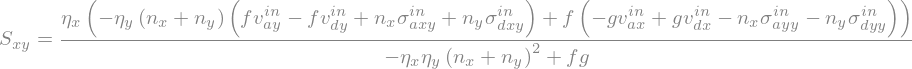

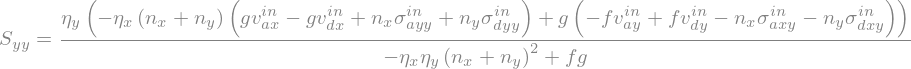

d:


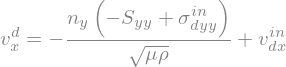

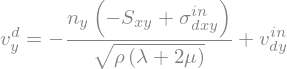

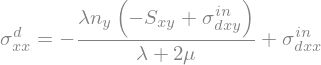

a:


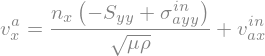

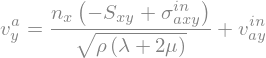

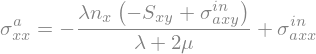

In [4]:
display(Eq(Sxy, S_xy), Eq(Syy, S_yy))
q_d, q_a = Matrix([vx_d, vy_d, sxx_d, sxy_d, syy_d]), Matrix([vx_a, vy_a, sxx_a, sxy_a, syy_a])
print('d:')
display(Eq(symbols('v_x^d'), q_d[0]), Eq(symbols('v_y^d'), q_d[1]), Eq(symbols('sigma_xx^d'), q_d[2]), Eq(symbols('sigma_xy^a'), q_d[3]), Eq(symbols('sigma_yy^d'), q_d[4]))
print('a:')
display(Eq(symbols('v_x^a'), q_a[0]), Eq(symbols('v_y^a'), q_a[1]), Eq(symbols('sigma_xx^a'), q_a[2]), Eq(symbols('sigma_xy^a'), q_a[3]), Eq(symbols('sigma_yy^a'), q_a[4]))

In [6]:
print(S_xy, '\n', S_yy)

eta_x*(-eta_y*(n_x + n_y)*(f*v^in_ay - f*v^in_dy + n_x*sigma^in_axy + n_y*sigma^in_dxy) + f*(-g*v^in_ax + g*v^in_dx - n_x*sigma^in_ayy - n_y*sigma^in_dyy))/(-eta_x*eta_y*(n_x + n_y)**2 + f*g) 
 eta_y*(-eta_x*(n_x + n_y)*(g*v^in_ax - g*v^in_dx + n_x*sigma^in_ayy + n_y*sigma^in_dyy) + g*(-f*v^in_ay + f*v^in_dy - n_x*sigma^in_axy - n_y*sigma^in_dxy))/(-eta_x*eta_y*(n_x + n_y)**2 + f*g)
